In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import *
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder\
        .master("local")\
.appName("SparkApp2233")\
.config("some.spark.option.config","somevalue")\
.getOrCreate()

In [3]:
df = pd.read_csv("C:\\Arunava Docs\\Pyspark Resourse\\car_price_prediction.csv.zip")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [6]:
df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [7]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [8]:
# Check Duplication
df.duplicated().sum()

np.int64(313)

In [9]:
df["ID"].count()

np.int64(19237)

In [10]:
df.shape

(19237, 18)

In [11]:
df.head(1)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


# Group By

In [12]:
df.groupby("Color")["ID"].count().reset_index(name="Count").sort_values(by="Count", ascending=False)

,Color,Count
1,Black,5033
14,White,4489
12,Silver,3792
7,Grey,2375
2,Blue,1396
11,Red,639
6,Green,322
8,Orange,253
3,Brown,187
4,Carnelian red,179


In [13]:
df.groupby("Wheel")["ID"].count().reset_index(name="Count").sort_values(by="Count", ascending=False)

,Wheel,Count
0,Left wheel,17753
1,Right-hand drive,1484


In [14]:
df.groupby("Drive wheels")["ID"].count().reset_index(name="Count").sort_values(by="Count", ascending=False)

,Drive wheels,Count
1,Front,12874
0,4x4,4058
2,Rear,2305


In [15]:
df.groupby("Gear box type")["ID"].count().reset_index(name="Count").sort_values(by="Count", ascending=False)

,Gear box type,Count
0,Automatic,13514
2,Tiptronic,3102
1,Manual,1875
3,Variator,746


In [16]:
df.groupby("Fuel type")["ID"].count().reset_index(name="Count").sort_values(by="Count", ascending=False)

,Fuel type,Count
5,Petrol,10150
1,Diesel,4036
2,Hybrid,3578
4,LPG,892
0,CNG,494
6,Plug-in Hybrid,86
3,Hydrogen,1


In [17]:
df.groupby("Leather interior")["ID"].count().reset_index(name="Count").sort_values(by="Count", ascending=False)

,Leather interior,Count
1,Yes,13954
0,No,5283


In [18]:
df.groupby("Prod. year")["ID"].count().reset_index(name="Count").sort_values(by="Prod. year", ascending=False)

,Prod. year,Count
53,2020,47
52,2019,306
51,2018,500
50,2017,959
49,2016,1476
48,2015,1549
47,2014,2124
46,2013,1963
45,2012,2155
44,2011,1612


In [19]:
df.groupby("Category")["ID"].count().reset_index(name="Count").sort_values(by="Count", ascending=False)

,Category,Count
9,Sedan,8736
4,Jeep,5473
3,Hatchback,2847
7,Minivan,647
1,Coupe,532
10,Universal,364
6,Microbus,306
2,Goods wagon,233
8,Pickup,52
0,Cabriolet,36


In [20]:
df.groupby("Manufacturer")["ID"].count().reset_index(name="Count").sort_values(by="Count", ascending=False)

,Manufacturer,Count
23,HYUNDAI,3769
58,TOYOTA,3662
36,MERCEDES-BENZ,2076
16,FORD,1111
8,CHEVROLET,1069
...,...,...
19,GREATWALL,1
2,ASTON MARTIN,1
44,PONTIAC,1
50,SATURN,1


In [21]:
df.groupby("Manufacturer")["Price"].mean().round(2).reset_index(name="Avg Sell").sort_values(by="Avg Sell", ascending=False)

,Manufacturer,Avg Sell
29,LAMBORGHINI,872946.00
4,BENTLEY,197574.50
42,OPEL,73305.62
14,FERRARI,66955.50
31,LAND ROVER,54053.49
...,...,...
60,VAZ,4613.58
40,MOSKVICH,4609.00
63,ZAZ,3822.50
48,ROVER,2433.33


# Matplotlib - Bar Charts

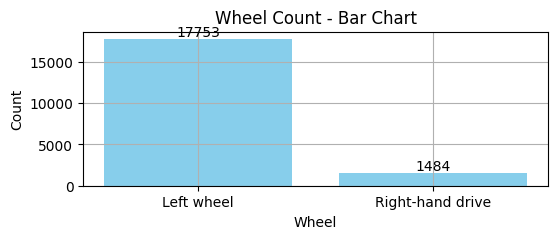

In [22]:
WheelCount = df.groupby("Wheel")["ID"].count().reset_index(name="Count").sort_values(by="Count", ascending=False)
fig = plt.figure(figsize=(6,2))
bars = plt.bar(WheelCount['Wheel'], WheelCount['Count'], color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')

plt.xlabel('Wheel')
plt.ylabel('Count')
plt.title('Wheel Count - Bar Chart')

plt.grid()
plt.show()

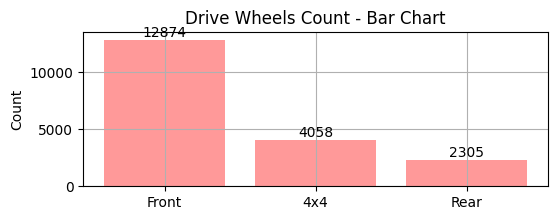

In [23]:
DriveWheelsCount = df.groupby("Drive wheels")["ID"].count().reset_index(name="Count").sort_values(by="Count", ascending=False)
fig = plt.figure(figsize=(6,2))
bars = plt.bar(DriveWheelsCount['Drive wheels'], DriveWheelsCount['Count'], color='red',alpha=0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')

plt.title('Drive Wheels Count - Bar Chart')
plt.ylabel("Count")
plt.grid()
plt.show()

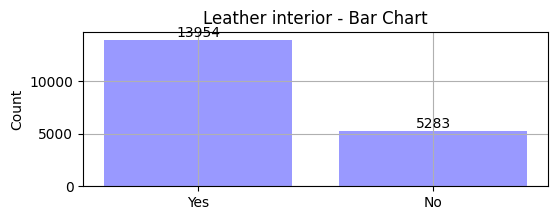

In [24]:
Leather = df.groupby("Leather interior")["ID"].count().reset_index(name="Count").sort_values(by="Count", ascending=False)
fig = plt.figure(figsize=(6,2))
bars = plt.bar(Leather['Leather interior'], Leather['Count'], color='blue',alpha=0.4)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')

plt.title('Leather interior - Bar Chart')
plt.ylabel("Count")
plt.grid()
plt.show()

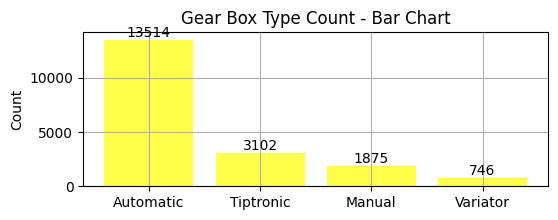

In [25]:
GearBoxType = df.groupby("Gear box type")["ID"].count().reset_index(name="Count").sort_values(by="Count", ascending=False)
fig = plt.figure(figsize=(6,2))
bars = plt.bar(GearBoxType['Gear box type'], GearBoxType['Count'], color='yellow',alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')

plt.title('Gear Box Type Count - Bar Chart')
plt.ylabel("Count")
plt.grid()
plt.show()

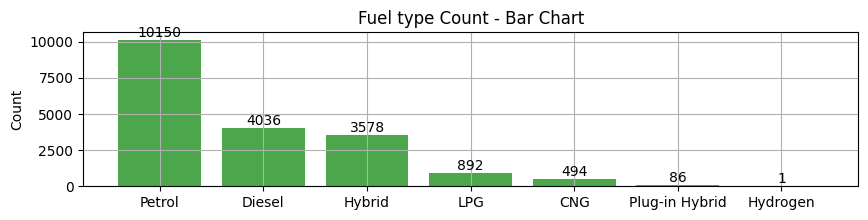

In [26]:
FuleType = df.groupby("Fuel type")["ID"].count().reset_index(name="Count").sort_values(by="Count", ascending=False)
fig = plt.figure(figsize=(10,2))
bars = plt.bar(FuleType ['Fuel type'], FuleType ['Count'], color='green',alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')

plt.title('Fuel type Count - Bar Chart')
plt.ylabel("Count")
plt.grid()
plt.show()

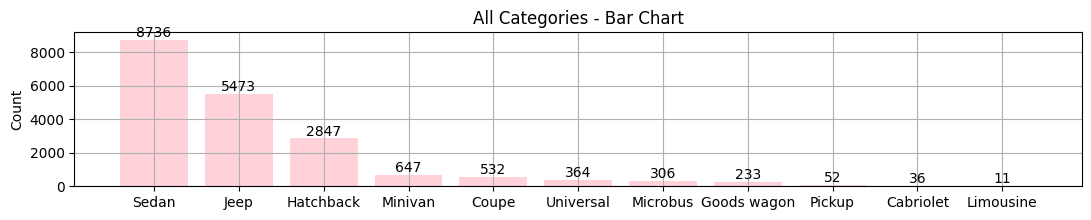

In [27]:
Category = df.groupby("Category")["ID"].count().reset_index(name="Count").sort_values(by="Count", ascending=False)
fig = plt.figure(figsize=(13,2))
bars = plt.bar(Category['Category'], Category['Count'], color='pink',alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')


plt.title('All Categories - Bar Chart')
plt.ylabel("Count")
plt.grid()
plt.show()

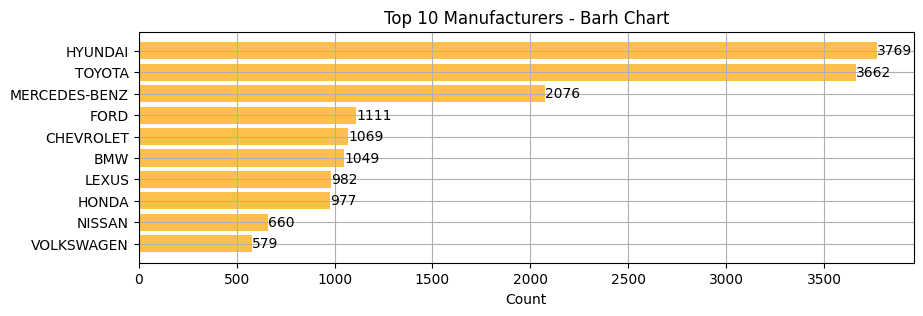

In [28]:
Manufacturer = df.groupby("Manufacturer")["ID"].count().reset_index(name="Count").sort_values(by="Count", ascending=False).head(10)
top_10_sorted = Manufacturer.sort_values(by='Count', ascending=True)
fig = plt.figure(figsize=(10,3))

bars = plt.barh( top_10_sorted['Manufacturer'],top_10_sorted['Count'], color='orange',alpha=0.7)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, str(width), ha='left', va='center')

plt.title('Top 10 Manufacturers - Barh Chart')
plt.xlabel("Count")
plt.grid()
plt.show()

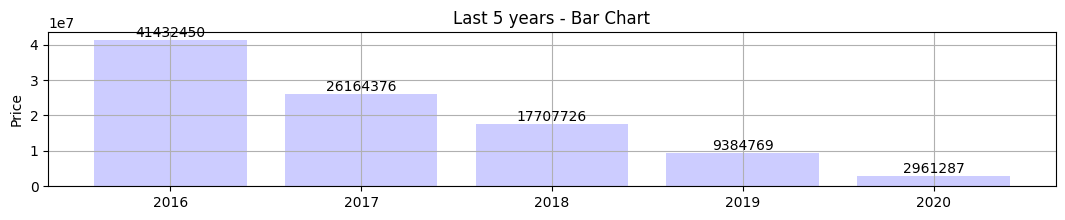

In [29]:
ProdYear = df.groupby("Prod. year")["Price"].sum().reset_index(name="Total Price").sort_values(by="Prod. year", ascending=False).head(5)
last_5_year = ProdYear.sort_values(by='Prod. year', ascending=False)
fig = plt.figure(figsize=(13,2))
bars = plt.bar(last_5_year ['Prod. year'], last_5_year ['Total Price'], color='blue',alpha=0.2)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')


plt.title('Last 5 years - Bar Chart')
plt.ylabel("Price")
plt.grid()
plt.show()

# Data Cleaning

In [30]:
#Check duplicate rows
df.duplicated().sum()

np.int64(313)

In [31]:
#count rows
df["ID"].count()

np.int64(19237)

In [32]:
#Drop duplicate rows
df = df.drop_duplicates()
df["ID"].count()

np.int64(18924)

In [33]:
#Delete rows before 1980
df= df[df['Prod. year'] >= 1990]

In [34]:
#Rename Column name
df.rename(columns={'Prod. year': 'Production Year'}, inplace=True)

In [35]:
#Column Split
df["Mileage (KM)"] = df["Mileage"].apply(lambda x: int(x.split(" ")[0]))

In [36]:
#Drop Column
df.drop('Mileage', axis=1, inplace=True)

In [37]:
# Replace value
df['Levy'] = df['Levy'].replace('-', 0) #Single Column
df.replace('-', 0, inplace=True) # Full DataFrame

In [38]:
# Casting string to int
df["Levy"] = pd.to_numeric(df["Levy"])

# Encoding

In [39]:
df["Mileage(M KM)"] = df["Mileage (KM)"]/1000000
df["Levy(K)"] = df["Levy"]/1000

In [40]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [42]:
X = df.drop(["ID", "Price","Doors", "Mileage (KM)", "Levy" ], axis=1)
Y = df["Price"]

In [43]:
transformer = ColumnTransformer(transformers=[
    ('t1', OneHotEncoder(sparse_output=False, drop='first'), 
             ['Manufacturer', 'Model', 'Category', 
             'Leather interior', 'Fuel type' ,'Engine volume', 
            'Gear box type', 'Drive wheels', 'Wheel', 'Color'])
    ], remainder='passthrough')

In [44]:
# Convert target variable to NumPy array
y = np.array(Y)
# Apply the transformation
x = transformer.fit_transform(X)

In [45]:
######################################################################################################################

# Model Tranning

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x.shape)
print(y.shape)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(18856, 1774)
(18856,)
(15084, 1774)
(15084,)
(3772, 1774)
(3772,)


In [47]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
x_test[0]

array([0.      , 0.      , 0.      , ..., 0.      , 0.189571, 0.574   ],
      shape=(1774,))

In [49]:
y_test

array([  706,  3607, 28523, ...,   549, 23207, 36733], shape=(3772,))

In [50]:
y_pred = model1.predict(x_test)
y_pred

array([   606.42076114,   1984.3602096 ,  10524.03151052, ...,
       -10868.95873186,  32035.02507825, 191998.7324433 ], shape=(3772,))

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error,r2_score

mae = mean_absolute_error(y_test, y_pred)

In [52]:
print("MAE: ", mae)

MAE:  18467.667539665283
